In [ ]:
import pandas as pd
import numpy as np

import os
from google.colab import files
from IPython.display import display

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
! mkdir 1.Dataset

mkdir: cannot create directory ‘1.Dataset’: File exists


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"planszoholik","key":"cbbd2da498d13b17c9cde6cc813dde13"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          15643        330  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                    2MB  2024-04-29 19:29:56           3018         61  1.0              
mexwell/heart-disease-dataset                                    🫀 Heart Disease Dataset                          399KB  2024-04-08 09:43:49           7173        112  1.0              
kapturovalexander/time-series-for-online-store                   🏪🏬🪫 E

In [ ]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
cards-image-datasetclassification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip cards-image-datasetclassification.zip -d 1.Dataset.

Archive:  cards-image-datasetclassification.zip
replace 1.Dataset./14card types-14-(200 X 200)-94.61.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data_dir = os.path.join("/content/1.Dataset.")

os.listdir(data_dir)

['test',
 '53cards-53-(200 X 200)-100.00.h5',
 'cards.csv',
 'train',
 '14card types-14-(200 X 200)-94.61.h5',
 'valid']

In [ ]:
card_path = os.path.join(data_dir, 'cards.csv')

cards_csv = pd.read_csv(card_path)

print(f"File shape: {cards_csv.shape}\n")
print(f"Data columns: {cards_csv.columns}\n")

File shape: (8155, 5)

Data columns: Index(['class index', 'filepaths', 'labels', 'card type', 'data set'], dtype='object')



In [ ]:
display(cards_csv.head(1))
print("\n\n")

print(f"\t######################## Train Data Sample ########################\n")
train_sample = cards_csv[cards_csv['data set'] == 'train'].sample(n=10)
display(train_sample)
print("\n\n")

print(f"\t######################## Test Data Sample ########################\n")
test_sample = cards_csv[cards_csv['data set'] == 'test'].sample(n=10)
display(train_sample)
print("\n\n")

print(f"\t######################## Validation Data Sample ########################\n")
valid_sample = cards_csv[cards_csv['data set'] == 'valid'].sample(n=10)
display(valid_sample)
print("\n\n")

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train





	######################## Train Data Sample ########################



,class index,filepaths,labels,card type,data set
10,0,train/ace of clubs/011.jpg,ace of clubs,ace,train
3490,23,train/king of hearts/109.jpg,king of hearts,king,train
6602,45,train/three of clubs/085.jpg,three of clubs,three,train
2791,18,train/jack of hearts/128.jpg,jack of hearts,jack,train
278,2,train/ace of hearts/029.jpg,ace of hearts,ace,train
7025,48,train/three of spades/116.jpg,three of spades,three,train
3239,21,train/king of clubs/121.jpg,king of clubs,king,train
4139,28,train/nine of spades/096.jpg,nine of spades,nine,train
7382,51,train/two of hearts/068.jpg,two of hearts,two,train
191,1,train/ace of diamonds/071.jpg,ace of diamonds,ace,train





	######################## Test Data Sample ########################



,class index,filepaths,labels,card type,data set
10,0,train/ace of clubs/011.jpg,ace of clubs,ace,train
3490,23,train/king of hearts/109.jpg,king of hearts,king,train
6602,45,train/three of clubs/085.jpg,three of clubs,three,train
2791,18,train/jack of hearts/128.jpg,jack of hearts,jack,train
278,2,train/ace of hearts/029.jpg,ace of hearts,ace,train
7025,48,train/three of spades/116.jpg,three of spades,three,train
3239,21,train/king of clubs/121.jpg,king of clubs,king,train
4139,28,train/nine of spades/096.jpg,nine of spades,nine,train
7382,51,train/two of hearts/068.jpg,two of hearts,two,train
191,1,train/ace of diamonds/071.jpg,ace of diamonds,ace,train





	######################## Validation Data Sample ########################



,class index,filepaths,labels,card type,data set
8060,34,valid/seven of diamonds/1.jpg,seven of diamonds,seven,valid
8111,44,valid/ten of spades/2.jpg,ten of spades,ten,valid
7947,11,valid/five of spades/3.jpg,five of spades,five,valid
7959,13,valid/four of diamonds/5.jpg,four of diamonds,four,valid
8149,51,valid/two of hearts/5.jpg,two of hearts,two,valid
8112,44,valid/ten of spades/3.jpg,ten of spades,ten,valid
8056,33,valid/seven of clubs/2.jpg,seven of clubs,seven,valid
8037,29,valid/queen of clubs/3.jpg,queen of clubs,queen,valid
8002,22,valid/king of diamonds/3.jpg,king of diamonds,king,valid
7984,18,valid/jack of hearts/5.jpg,jack of hearts,jack,valid


In [ ]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [ ]:
train_sample.filepaths.to_list()

['train/ace of clubs/011.jpg',
 'train/king of hearts/109.jpg',
 'train/three of clubs/085.jpg',
 'train/jack of hearts/128.jpg',
 'train/ace of hearts/029.jpg',
 'train/three of spades/116.jpg',
 'train/king of clubs/121.jpg',
 'train/nine of spades/096.jpg',
 'train/two of hearts/068.jpg',
 'train/ace of diamonds/071.jpg']

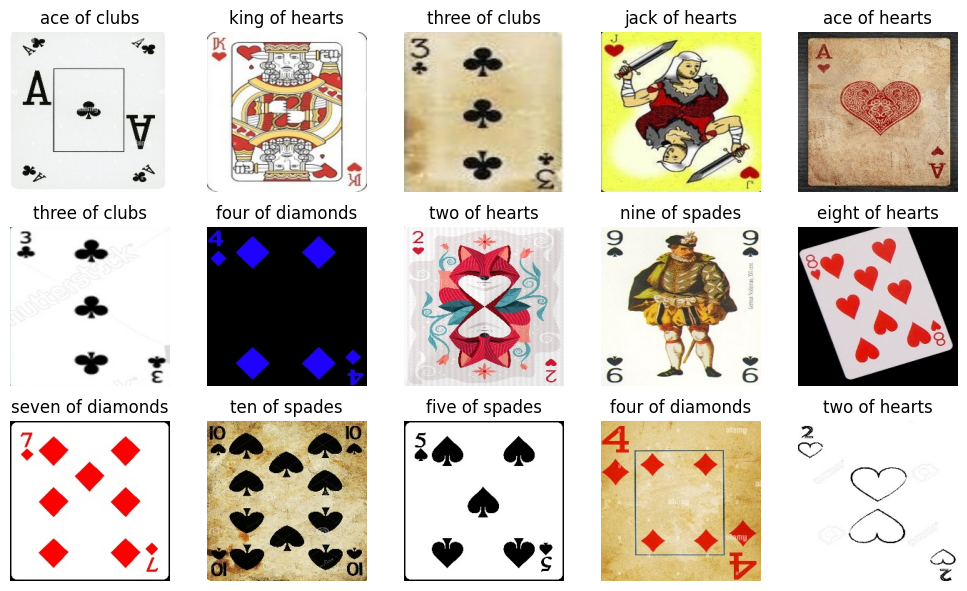

In [ ]:
train_filepaths = train_sample.filepaths.to_list()[:5]
test_filepaths = test_sample.filepaths.to_list()[:5]
valid_filepaths = valid_sample.filepaths.to_list()[:5]

image_filepaths = train_filepaths + test_filepaths + valid_filepaths
image_files = [os.path.join(data_dir, file) for file in image_filepaths]

num_images = len(image_files)
num_rows = 3
num_cols = num_images // num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    image = plt.imread(image_file)
    axs[row, col].imshow(image)
    axs[row, col].set_title(image_file.split("/")[-2])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
 labels = os.listdir(os.path.join(data_dir, 'train'))
labels = sorted(labels)
print(labels)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/224.0
                                  #  , rotation_range = 90
                                  #  , width_shift_range = 0.7
                                  #  , height_shift_range = 0.7
                                  #  , zoom_range = 0.5
                                  #  , horizontal_flip = True
                                  #  , vertical_flip = True
                                  #  , fill_mode= 'nearest'
                                   )

train_gen = train_datagen.flow_from_directory(train_dir
                                              , target_size = (224, 224)
                                              , batch_size = 70
                                              , class_mode = 'categorical' )

valid_datagen = ImageDataGenerator(rescale = 1/224.0)

valid_gen = valid_datagen.flow_from_directory(valid_dir
                                              , target_size = (224, 224)
                                              , batch_size = 25
                                              , class_mode ='categorical')

test_datagen = ImageDataGenerator(rescale = 1/224.0)

test_gen = test_datagen.flow_from_directory(test_dir
                                            , target_size = (224, 224)
                                            , batch_size = 25
                                            , class_mode = 'categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
lr = 0.00001
batch_size = 10
epoch_size = 10

adam_optimizer = Adam(learning_rate = lr)
rmsprop_optimizer = RMSprop(learning_rate = lr)

In [ ]:
model = Sequential([ # Defining Convolution layers.

                    ## First convolution layer.
                    Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Second convolutional layer.
                    , Conv2D(32, (3, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Third convolutional layer.
                    , Conv2D(64, (3, 3), activation = 'relu')
                    , MaxPooling2D((3,3))
                    ## Fourth convolutional layer.
                    , Conv2D(128, (3, 3), activation = 'relu')

                    # Defining Dense neuroal network layers.

                    ## Flattent input layer.
                    , Flatten()
                    ## Firest hidden layer.
                    , Dense(525, activation = 'relu')
                    ## Second hidden layer.
                    , Dense(250, activation = 'relu')
                    ## Output layer.
                    , Dense(53, activation = 'softmax')
                    ])

model.compile(optimizer = rmsprop_optimizer
              , loss = 'categorical_crossentropy'
              , metrics = ['accuracy'])

## Training model
history = model.fit(train_gen
                    , epochs = epoch_size
                    , validation_data = valid_gen
                    , verbose = 1)

Epoch 1/10
 54/109 [=============>................] - ETA: 1:54 - loss: 3.9686 - accuracy: 0.0225

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

history_df = pd.DataFrame(history.history)
display(history_df.head(20))
print('\n\n')

axes[0].plot(history_df)
axes[0].set_title('Training VS. Validation Accuracy & Loss Graph')
axes[0].grid(False)

loss_df = history_df[['loss', 'val_loss']]
axes[1].plot(loss_df)
axes[1].set_title('Train VS. Validation Loss Graph')
axes[1].set_ylabel('Loss Rate')
axes[1].set_xlabel('Epoch')
axes[1].grid(False)

accuracy_df = history_df[['accuracy', 'val_accuracy']]
axes[2].plot(accuracy_df)
axes[2].set_title('Train VS. Validation Accuracy Graph')
axes[2].set_ylabel('Accuracy Rate')
axes[2].set_xlabel('Epoch')
axes[2].set_ylim(0, 1)
axes[2].grid(False)

plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/3.Model/model_1.h5')

In [ ]:
files.download('/content/3.Model/model_1.h5')

In [ ]:
model.evaluate(test_gen)

Testy

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('3.Model/model_1.h5')

Saving png-transparent-ace-of-spades-playing-card-ace-of-hearts-ace-card-miscellaneous-game-angle.png to png-transparent-ace-of-spades-playing-card-ace-of-hearts-ace-card-miscellaneous-game-angle.png
1/1 [==============================] - 0s 30ms/step


 Model prediction ---> 3
 The card is a: ace of spades




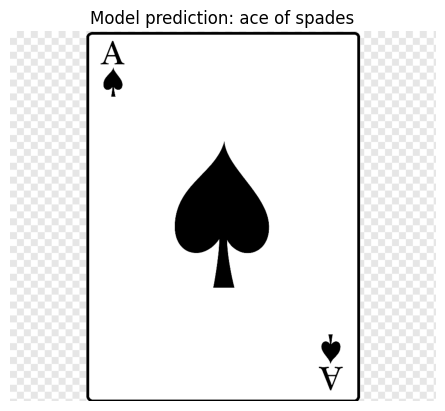

In [ ]:
upload = files.upload()

for filename in upload.keys():

    img_arr = load_img(filename, target_size = (224, 224))
    img_arr = img_to_array(img_arr)
    img_arr = img_arr/224.0

    img_arr = np.expand_dims(img_arr, axis = 0)

    pred = model.predict(img_arr)
    pred_value = np.argmax(pred[0])
    card_name = labels[pred_value]
    print(f"\n\n Model prediction ---> {pred_value}")
    print(f" The card is a: {card_name}\n\n")

    title = 'Model prediction: ' + card_name
    img_show = plt.imread(filename)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(title)

plt.show();

1/1 [==============================] - 0s 157ms/step


 Model prediction ---> 34
 The card is a: seven of diamonds




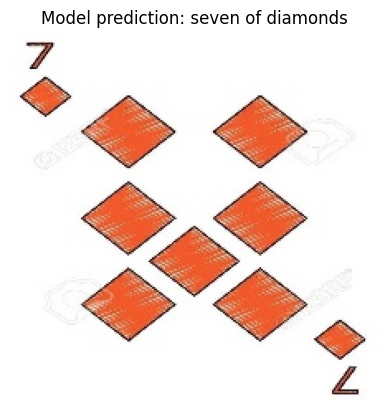

In [ ]:
path = os.path.join('/content/1.Dataset./test/seven of diamonds/5.jpg')

img = load_img(path, target_size = (224, 224))
img_arr = img_to_array(img)
img_arr = img_arr/224.0

img_arr = np.expand_dims(img_arr, axis = 0)
img_arr = np.vstack([img_arr])

pred = model.predict(img_arr)
pred_value = np.argmax(pred[0])
card_name = labels[pred_value]
print(f"\n\n Model prediction ---> {pred_value}")
print(f" The card is a: {card_name}\n\n")

title = 'Model prediction: ' + card_name
img_show = plt.imread(path)
plt.imshow(img_show)
plt.axis('off')
plt.title(title);